In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

kannada_train = pd.read_csv('/content/drive/MyDrive/Shared Task- Offensive Language Identification/datasets/kannada_offensive_train.csv')
display(kannada_train.head())

,Text,Labels
0,Avnige ella language matadoke barutta,Not_offensive
1,ರಕ್ಷಿತ್ ನಿಮ್ಮ ಕೈಯಲ್ಲಿ ಕನ್ನಡ nಸುರಕ್ಷಿತ,Not_offensive
2,God blees you sir hanumantana krupe nima melirali,Not_offensive
3,Super song,Not_offensive
4,Yes yes yes🤟,not-Kannada


In [ ]:
import pandas as pd

kannada_dev = pd.read_csv('/content/drive/MyDrive/Shared Task- Offensive Language Identification/datasets/kannada_offensive_dev.csv')
display(kannada_dev.head())

,Text,Labels
0,Still trending No1...nAfter 4days....,Not_offensive
1,@VARAPRASAD K K hawdo nin Amman gaandu dagaar ...,Offensive_Targeted_Insult_Individual
2,Anjali Devi hii,not-Kannada
3,Ha mundalochane matte dooradrusti .....avaraha...,Not_offensive
4,Super vice kanree nimdu,Not_offensive


Test dataset without labels

In [ ]:
kannada_test = pd.read_csv('/content/drive/MyDrive/Shared Task- Offensive Language Identification/datasets/kannada_offensive_test_without_labels.csv')

In [ ]:
print("Train columns:", kannada_train.columns)
print("Dev columns:", kannada_dev.columns)

print("\nTrain label distribution:")
print(kannada_train['Labels'].value_counts())

print("\nDev label distribution:")
print(kannada_dev['Labels'].value_counts())

Train columns: Index(['Text', 'Labels'], dtype='object')
Dev columns: Index(['Text', 'Labels'], dtype='object')

Train label distribution:
Labels
Not_offensive                           3544
not-Kannada                             1522
Offensive_Targeted_Insult_Individual     487
Offensive_Targeted_Insult_Group          329
Offensive_Untargetede                    212
Offensive_Targeted_Insult_Other          123
Name: count, dtype: int64

Dev label distribution:
Labels
Not_offensive                           426
not-Kannada                             191
Offensive_Targeted_Insult_Individual     66
Offensive_Targeted_Insult_Group          45
Offensive_Untargetede                    33
Offensive_Targeted_Insult_Other          16
Name: count, dtype: int64


Pre Processing

Noise reduction

Unicode normalization

Emoji & symbol handling

Token normalization

Hashtags, mentions, URLs

In [ ]:
!pip install emoji indic-nlp-library -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 110.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.3/119.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.5/82.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92

In [ ]:
from indicnlp.normalize.indic_normalize import IndicNormalizerFactory
normalizer = IndicNormalizerFactory().get_normalizer("kn")  # Kannada normalizer

In [ ]:
import re
import emoji

def advanced_kannada_preprocess(text):
    # Step 1: Lowercase (helps uniformity)
    text = str(text).lower()

    # Step 2: Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)

    # Step 3: Remove user mentions and hashtags
    text = re.sub(r"@\w+", '', text)
    text = re.sub(r"#\w+", '', text)

    # Step 4: Remove emojis and keep their meaning (optional)
    text = emoji.demojize(text, delimiters=(" ", " "))
    text = re.sub(r":", ' ', text)  # remove colons around emoji names

    # Step 5: Remove digits and special symbols (retain Kannada + English)
    text = re.sub(r'[^ಀ-೿a-zA-Z\s]', '', text)

    # Step 6: Normalize repeated characters (e.g., “supeerrrr” → “super”)
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    # Step 7: Unicode normalization for Kannada
    text = normalizer.normalize(text)

    # Step 8: Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [ ]:
kannada_train['clean_text'] = kannada_train['Text'].apply(advanced_kannada_preprocess)
kannada_dev['clean_text'] = kannada_dev['Text'].apply(advanced_kannada_preprocess)
kannada_test['clean_text'] = kannada_test['Text'].apply(advanced_kannada_preprocess)

In [ ]:
print("Train columns:", kannada_train.columns)
print("Dev columns:", kannada_dev.columns)

print("\nTrain label distribution:")
print(kannada_train['Labels'].value_counts())

print("\nDev label distribution:")
print(kannada_dev['Labels'].value_counts())

Train columns: Index(['Text', 'Labels', 'clean_text'], dtype='object')
Dev columns: Index(['Text', 'Labels', 'clean_text'], dtype='object')

Train label distribution:
Labels
Not_offensive                           3544
not-Kannada                             1522
Offensive_Targeted_Insult_Individual     487
Offensive_Targeted_Insult_Group          329
Offensive_Untargetede                    212
Offensive_Targeted_Insult_Other          123
Name: count, dtype: int64

Dev label distribution:
Labels
Not_offensive                           426
not-Kannada                             191
Offensive_Targeted_Insult_Individual     66
Offensive_Targeted_Insult_Group          45
Offensive_Untargetede                    33
Offensive_Targeted_Insult_Other          16
Name: count, dtype: int64


Feature Engineering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine all data for consistent vocabulary
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit on train and transform both train/dev/test
X_train_tfidf = tfidf_vectorizer.fit_transform(kannada_train['clean_text'])
X_dev_tfidf = tfidf_vectorizer.transform(kannada_dev['clean_text'])
X_test_tfidf = tfidf_vectorizer.transform(kannada_test['clean_text'])

y_train_tfidf = kannada_train['Labels']
y_dev_tfidf = kannada_dev['Labels']


/tmp/ipython-input-11-826840894.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Labels', data=kannada_train, palette='viridis')


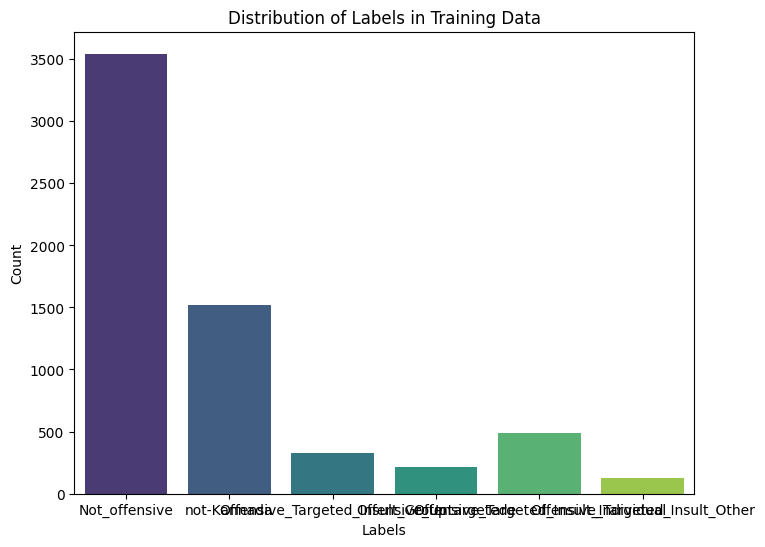

/tmp/ipython-input-11-826840894.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Labels', data=kannada_dev, palette='viridis')


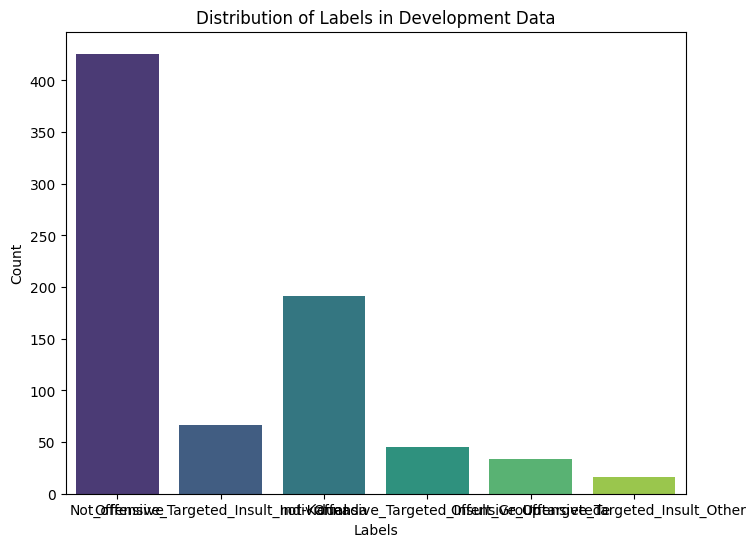

In [ ]:
# prompt: Distribution of labels in the training data provided in the dataset

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution for training data
plt.figure(figsize=(8, 6))
sns.countplot(x='Labels', data=kannada_train, palette='viridis')
plt.title('Distribution of Labels in Training Data')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

# Plotting the distribution for development data
plt.figure(figsize=(8, 6))
sns.countplot(x='Labels', data=kannada_dev, palette='viridis')
plt.title('Distribution of Labels in Development Data')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_tfidf)
y_dev_enc = le.transform(y_dev_tfidf)


Ensemble Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


 Classifier

In [ ]:
!pip install xgboost -q

In [ ]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


clf_lr = LogisticRegression()

clf_xgb = xgb.XGBClassifier(
    max_depth=20, n_estimators=80, learning_rate=0.1,
    colsample_bytree=0.7, gamma=0.1, reg_alpha=4,
    objective='multi:softmax', use_label_encoder=False,
    eval_metric='mlogloss'
)

clf_mlp = MLPClassifier(hidden_layer_sizes=(150, 100, 50),
                        max_iter=300, activation='relu',
                        solver='adam', random_state=1)

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)

clf_svc = SVC(probability=True, kernel='linear')

clf_knn = KNeighborsClassifier(n_neighbors=5)

COMBINING CLASSIFEIER

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('lr', clf_lr),
        ('xgb', clf_xgb),
        ('mlp', clf_mlp),
        ('rf', clf_rf),
        ('svc', clf_svc),
        ('knn', clf_knn)
    ],
    voting='hard'  # or 'soft' if all classifiers support predict_proba
)


Prediction on Dev datasets

In [ ]:
voting_clf.fit(X_train_tfidf, y_train_enc)

y_pred_enc = voting_clf.predict(X_dev_tfidf)
y_pred_VOTING= le.inverse_transform(y_pred_enc)

from sklearn.metrics import classification_report
print(classification_report(y_dev_tfidf, y_pred_VOTING))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:39:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                                      precision    recall  f1-score   support

                       Not_offensive       0.66      0.89      0.76       426
     Offensive_Targeted_Insult_Group       0.50      0.09      0.15        45
Offensive_Targeted_Insult_Individual       0.73      0.33      0.46        66
     Offensive_Targeted_Insult_Other       0.00      0.00      0.00        16
               Offensive_Untargetede       1.00      0.03      0.06        33
                         not-Kannada       0.68      0.59      0.63       191

                            accuracy                           0.67       777
                           macro avg       0.60      0.32      0.34       777
                        weighted avg       0.67      0.67      0.62       777



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


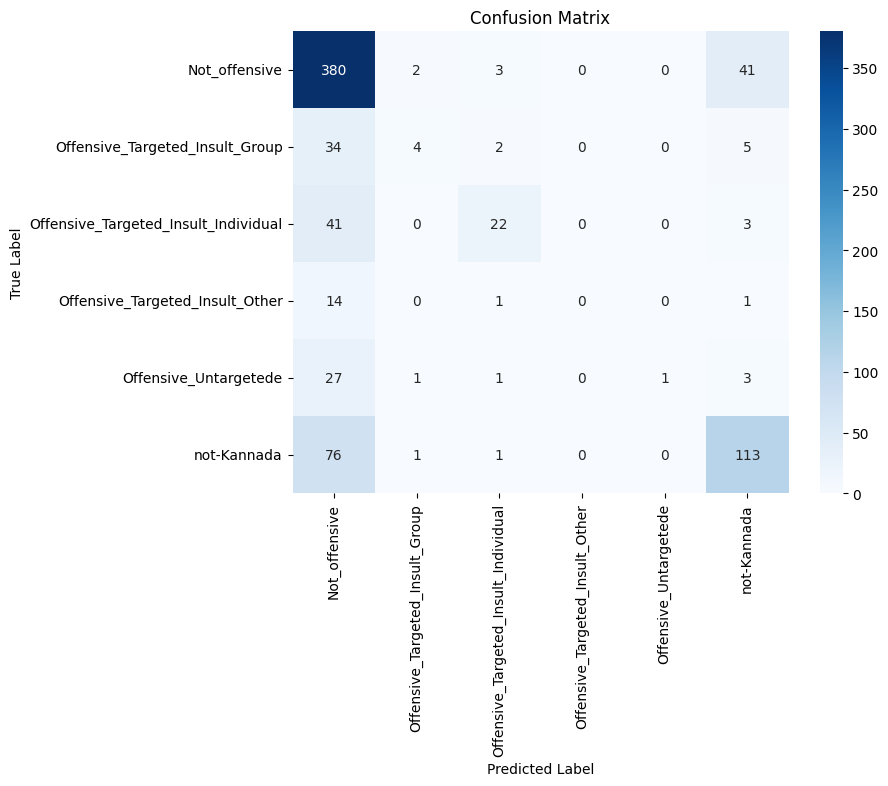

In [ ]:
# prompt: give me  a confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_dev_tfidf, y_pred_VOTING, labels=le.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

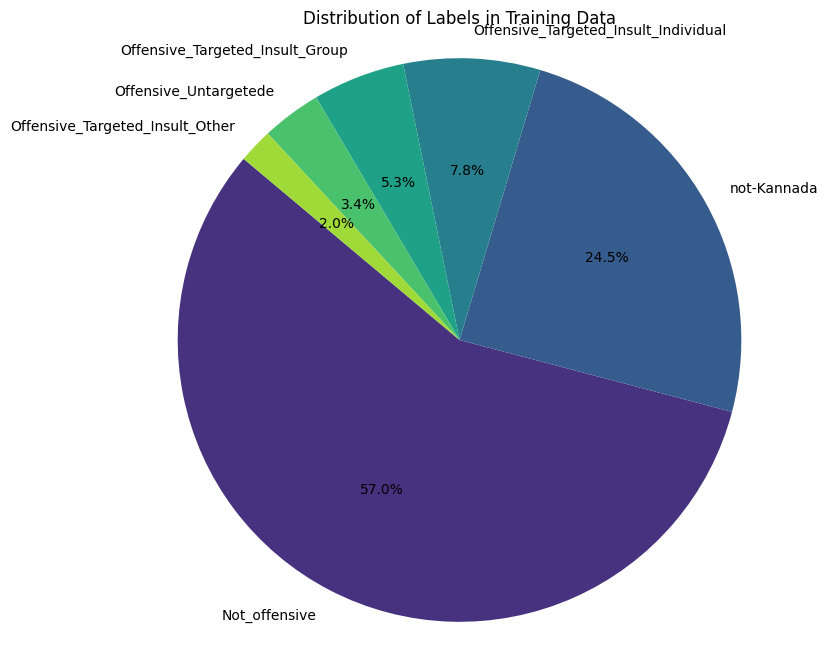

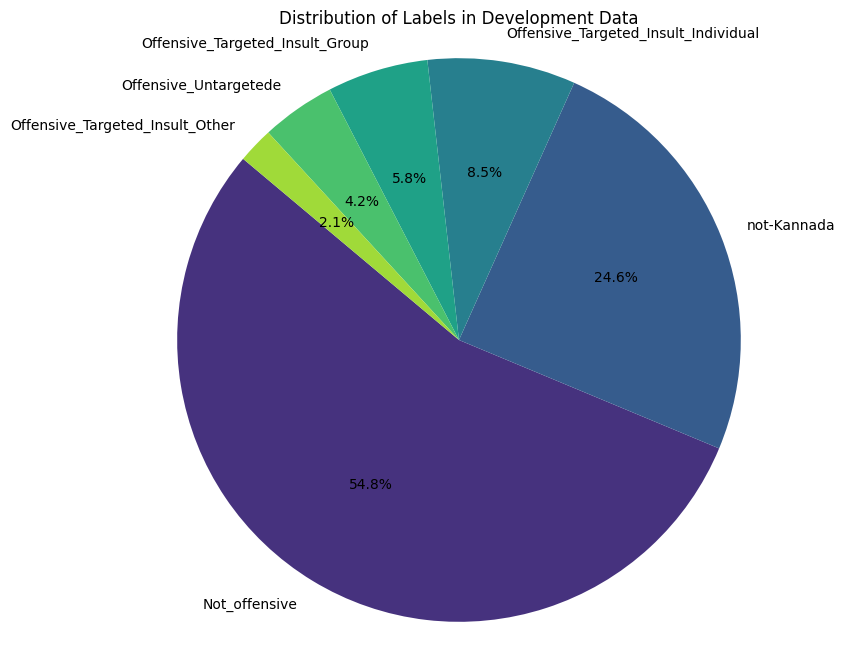

In [ ]:
# prompt: give me a pie chart

import matplotlib.pyplot as plt
# Pie chart for train label distribution
train_labels = kannada_train['Labels'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(train_labels, labels=train_labels.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(train_labels)))
plt.title('Distribution of Labels in Training Data')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Pie chart for dev label distribution
dev_labels = kannada_dev['Labels'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(dev_labels, labels=dev_labels.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(dev_labels)))
plt.title('Distribution of Labels in Development Data')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Test data- prediction

In [ ]:
# Step 1: Predict with Voting Classifier
y_test_pred_enc = voting_clf.predict(X_test_tfidf)
y_test_pred_labels = le.inverse_transform(y_test_pred_enc)

# Step 2: Create proper submission DataFrame
submission_df = pd.DataFrame({
    'Id': kannada_test['ID'],
    'labels': y_test_pred_labels
})

# Step 3: Save to CSV
submission_df.to_csv('kannada_TFIDF_Ensemble_submission.csv', index=False)

# 2.  FastText + CNN-GRU + TF-IDF Fusion Model


Feature Engineering - tokenizer +TFIDF

Setup — Tokenizer, TF-IDF, and Label Encoder

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

texts_train = kannada_train['clean_text'].tolist()
texts_dev = kannada_dev['clean_text'].tolist()
labels_train = kannada_train['Labels'].tolist()
labels_dev = kannada_dev['Labels'].tolist()

# Label encoding
le = LabelEncoder()
y_train = le.fit_transform(labels_train)
y_dev = le.transform(labels_dev)

# Tokenizer for sequence input
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts_train)
X_seq_train = tokenizer.texts_to_sequences(texts_train)
X_seq_dev = tokenizer.texts_to_sequences(texts_dev)

max_len = 100
X_seq_train = pad_sequences(X_seq_train, maxlen=max_len, padding='post')
X_seq_dev = pad_sequences(X_seq_dev, maxlen=max_len, padding='post')

# TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf_train = tfidf.fit_transform(texts_train).toarray()
X_tfidf_dev = tfidf.transform(texts_dev).toarray()


 Load FastText and Build Embedding Matrix

In [ ]:
!pip install fasttext -q
import fasttext
import fasttext.util

# Load Kannada FastText
fasttext.util.download_model('kn', if_exists='ignore')
ft_model = fasttext.load_model('cc.kn.300.bin')

# Create embedding matrix
embedding_dim = 300
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    embedding_matrix[i] = ft_model.get_word_vector(word)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done



 Build Hybrid Fusion Model -FT,TFIDF,

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Embedding, Conv1D, GRU,
                                     GlobalMaxPooling1D, Dense, Dropout, Concatenate)

num_classes = len(le.classes_)

# Input 1: FastText Embedding + CNN + GRU
seq_input = Input(shape=(max_len,))
x = Embedding(input_dim=vocab_size, output_dim=embedding_dim,
              weights=[embedding_matrix], input_length=max_len, trainable=False)(seq_input)
x = Conv1D(128, 5, activation='relu')(x)
x = GRU(64, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(64, activation='relu')(x)

# Input 2: TF-IDF
tfidf_input = Input(shape=(X_tfidf_train.shape[1],))
y = Dense(64, activation='relu')(tfidf_input)

# Fusion
merged = Concatenate()([x, y])
z = Dense(64, activation='relu')(merged)
z = Dropout(0.3)(z)
output = Dense(num_classes, activation='softmax')(z)

model = Model(inputs=[seq_input, tfidf_input], outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 100, 300)  │  4,576,800 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 96, 128)   │    192,128 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru (GRU)           │ (None, 96, 64)    │     37,248 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ gru[0][0]         │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 5000)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      4,160 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │    320,064 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ dense[0][0],      │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 6)         │        390 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,139,046 (19.60 MB)

 Trainable params: 562,246 (2.14 MB)

 Non-trainable params: 4,576,800 (17.46 MB)

In [ ]:
history = model.fit(
    [X_seq_train, X_tfidf_train], y_train,
    epochs=10, batch_size=32,
    validation_data=([X_seq_dev, X_tfidf_dev], y_dev)
)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 24s 110ms/step - accuracy: 0.5511 - loss: 1.3235 - val_accuracy: 0.6486 - val_loss: 0.9502
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.7194 - loss: 0.7941 - val_accuracy: 0.6782 - val_loss: 0.8777
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - accuracy: 0.7952 - loss: 0.5760 - val_accuracy: 0.7040 - val_loss: 0.8881
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.8514 - loss: 0.4198 - val_accuracy: 0.6885 - val_loss: 0.9551
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.8830 - loss: 0.3237 - val_accuracy: 0.6976 - val_loss: 1.0314
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.9147 - loss: 0.2533 - val_accuracy: 0.6988 - val_loss: 1.1125
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.9380 - loss: 0.1849 - val_accuracy: 0.6898 - val_loss: 1.1862
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - accuracy: 0.9521 - loss: 0

In [ ]:
from sklearn.metrics import classification_report

y_pred_probs = model.predict([X_seq_dev, X_tfidf_dev])
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred_labels = le.inverse_transform(y_pred)

print(classification_report(labels_dev, y_pred_labels))


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
                                      precision    recall  f1-score   support

                       Not_offensive       0.74      0.78      0.76       426
     Offensive_Targeted_Insult_Group       0.28      0.20      0.23        45
Offensive_Targeted_Insult_Individual       0.61      0.55      0.58        66
     Offensive_Targeted_Insult_Other       0.14      0.19      0.16        16
               Offensive_Untargetede       0.19      0.12      0.15        33
                         not-Kannada       0.64      0.65      0.65       191

                            accuracy                           0.66       777
                           macro avg       0.43      0.41      0.42       777
                        weighted avg       0.64      0.66      0.65       777



In [ ]:
# Assuming the test set has a column named 'Id'
texts_test = kannada_test['clean_text'].tolist()

# Step 1: Prepare both input features
# Use the existing Tokenizer and padding
X_seq_test = tokenizer.texts_to_sequences(texts_test)
X_seq_test = pad_sequences(X_seq_test, maxlen=max_len, padding='post')

X_tfidf_test = tfidf.transform(texts_test).toarray()

# Step 2: Predict probabilities → Convert to class index → Decode labels
y_test_pred_probs = model.predict([X_seq_test, X_tfidf_test])
y_test_pred = np.argmax(y_test_pred_probs, axis=1)
y_test_labels = le.inverse_transform(y_test_pred)

# Step 3: Prepare final submission format
submission_df = pd.DataFrame({
    'Id': kannada_test['ID'],        # Ensure your test data has an 'Id' column
    'labels': y_test_labels
})

#  Step 4: Save as submission CSV
submission_df.to_csv('kannada_hybrid_FT_TFIDF_gru_cnn.csv', index=False)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


# IndicBERT + MLPClassifier

In [ ]:
from transformers import AutoTokenizer, AutoModel

# Correct model name for IndicBERT
model_IndicBERT = "ai4bharat/indic-bert"

tokenizer = AutoTokenizer.from_pretrained(model_IndicBERT)
model_IndicBERT = AutoModel.from_pretrained(model_IndicBERT)
model_IndicBERT.eval()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/5.65M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/135M [00:00<?, ?B/s]

AlbertModel(
  (embeddings): AlbertEmbeddings(
    (word_embeddings): Embedding(200000, 128, padding_idx=0)
    (position_embeddings): Embedding(512, 128)
    (token_type_embeddings): Embedding(2, 128)
    (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0, inplace=False)
  )
  (encoder): AlbertTransformer(
    (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
    (albert_layer_groups): ModuleList(
      (0): AlbertLayerGroup(
        (albert_layers): ModuleList(
          (0): AlbertLayer(
            (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (attention): AlbertAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (attention_dropout): Dropout(p=0, inplace=False)
     

In [ ]:
# 2. Define Function to Extract CLS Token Embeddings
from tqdm import tqdm
import numpy as np
import torch # Make sure torch is imported

def get_indicbert_cls_embeddings(texts, batch_size=16, max_length=128):
    all_embeddings = []

    for i in tqdm(range(0, len(texts), batch_size)):
        batch_texts = texts[i:i+batch_size]

        # Tokenize and convert to tensors
        inputs = tokenizer(batch_texts, return_tensors='pt', padding=True, truncation=True, max_length=max_length)

        with torch.no_grad():
            # Explicitly pass the input tensors
            outputs = model_IndicBERT(input_ids=inputs['input_ids'],
                                      attention_mask=inputs['attention_mask'])
            # Add token_type_ids if present in inputs and required by the model
            if 'token_type_ids' in inputs and hasattr(model_IndicBERT, 'token_type_ids'):
                 outputs = model_IndicBERT(input_ids=inputs['input_ids'],
                                           attention_mask=inputs['attention_mask'],
                                           token_type_ids=inputs['token_type_ids'])
            else:
                 outputs = model_IndicBERT(input_ids=inputs['input_ids'],
                                           attention_mask=inputs['attention_mask'])


        # Get [CLS] token embeddings (first token)
        cls_embeds = outputs.last_hidden_state[:, 0, :]  # shape: (batch_size, 768)
        all_embeddings.append(cls_embeds.cpu().numpy())

    return np.vstack(all_embeddings)

In [ ]:
# 3. Prepare Train / Dev / Test Datasets
# Assuming you already preprocessed the text using `advanced_kannada_preprocess`

texts_train = kannada_train['clean_text'].tolist()
texts_dev = kannada_dev['clean_text'].tolist()
texts_test = kannada_test['clean_text'].tolist()

labels_train = kannada_train['Labels'].tolist()
labels_dev = kannada_dev['Labels'].tolist()


In [ ]:
# 4. Extract IndicBERT CLS Embeddings
X_train_ib = get_indicbert_cls_embeddings(texts_train)
X_dev_ib = get_indicbert_cls_embeddings(texts_dev)
X_test_ib = get_indicbert_cls_embeddings(texts_test)  # Test set has no labels


100%|██████████| 49/49 [03:49<00:00,  4.69s/it]


In [ ]:
# 5. Encode Labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(labels_train)
y_dev_enc = le.transform(labels_dev)



In [ ]:
#  6. Train MLPClassifier on IndicBERT embeddings
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

mlp.fit(X_train_ib, y_train_enc)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=300, random_state=42)

In [ ]:
# 7. Evaluate on Dev Set
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Re-fit the LabelEncoder within this cell to ensure it's fitted before inverse_transform
le = LabelEncoder()
le.fit(labels_dev) # Fit on dev labels to ensure all possible labels for inverse_transform are covered

y_pred_dev = mlp.predict(X_dev_ib)
y_pred_dev_labels = le.inverse_transform(y_pred_dev)

print(classification_report(labels_dev, y_pred_dev_labels))

                                      precision    recall  f1-score   support

                       Not_offensive       0.71      0.78      0.74       426
     Offensive_Targeted_Insult_Group       0.23      0.20      0.21        45
Offensive_Targeted_Insult_Individual       0.39      0.33      0.36        66
     Offensive_Targeted_Insult_Other       0.00      0.00      0.00        16
               Offensive_Untargetede       0.00      0.00      0.00        33
                         not-Kannada       0.67      0.74      0.70       191

                            accuracy                           0.65       777
                           macro avg       0.33      0.34      0.34       777
                        weighted avg       0.60      0.65      0.62       777



In [ ]:
# 8. Predict on Test Set (Without Labels)
y_test_pred = mlp.predict(X_test_ib)
y_test_labels = le.inverse_transform(y_test_pred)

# Create submission DataFrame with ID and Label
submission_df = pd.DataFrame({
    'Id': kannada_test['ID'],               # Make sure this column exists in your test CSV
    'labels': y_test_labels
})

# Save to CSV
submission_df.to_csv("kannada_test_IndicBERT_MLP_submission.csv", index=False)


# 2. XLM-Roberta (XLM-R)

✔ Use xlm-roberta-base from HuggingFace 🤗
✔ Extract CLS-token embeddings from text
✔ Train a classifier (like Logistic Regression) on those embeddings
✔ Evaluate on dev set

In [ ]:
!pip install transformers -q
!pip install torch -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.3 MB/s eta 0:00:00


**Step 2: Load XLM-R Tokenizer and Model**
# MODEL 1= xlm-roberta-base

Why XLM-R?
Trained on 100+ languages (including Kannada, Tamil, Malayalam)
Context-aware, handles code-mixed and low-resource texts well

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load pretrained tokenizer and model
model_xlm_roberta = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_xlm_roberta)
model = AutoModel.from_pretrained(model_xlm_roberta)
model.eval()  # Set to eval mode, since we are not fine-tuning


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

XLMRobertaModel(
  (embeddings): XLMRobertaEmbeddings(
    (word_embeddings): Embedding(250002, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): XLMRobertaEncoder(
    (layer): ModuleList(
      (0-11): 12 x XLMRobertaLayer(
        (attention): XLMRobertaAttention(
          (self): XLMRobertaSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): XLMRobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine

# Feature Extraction Function (CLS Token)- XLM-Roberta

 Whats happening here?
  Tokenizes and batches the text
  Passes through XLM-R to get last hidden state
  Extracts CLS  token as sentence embedding

In [ ]:
!pip install transformers -q
!pip install torch -q

**Step 2: Load XLM-R Tokenizer and Model**
# MODEL 1= xlm-roberta-base

Why XLM-R?
Trained on 100+ languages (including Kannada, Tamil, Malayalam)
Context-aware, handles code-mixed and low-resource texts well

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load pretrained tokenizer and model
model_xlm_roberta = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_xlm_roberta)
model = AutoModel.from_pretrained(model_xlm_roberta)
model.eval()  # Set to eval mode, since we are not fine-tuning


XLMRobertaModel(
  (embeddings): XLMRobertaEmbeddings(
    (word_embeddings): Embedding(250002, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): XLMRobertaEncoder(
    (layer): ModuleList(
      (0-11): 12 x XLMRobertaLayer(
        (attention): XLMRobertaAttention(
          (self): XLMRobertaSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): XLMRobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine

# Feature Extraction Function (CLS Token)- XLM-Roberta

 Whats happening here?
  Tokenizes and batches the text
  Passes through XLM-R to get last hidden state
  Extracts CLS  token as sentence embedding

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from tqdm import tqdm

# Load pretrained tokenizer and model (duplicated from ZG9Q6yfp2wKZ to ensure correct objects are used)
model_xlm_roberta = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_xlm_roberta)
model = AutoModel.from_pretrained(model_xlm_roberta)
model.eval()  # Set to eval mode


# Define Feature Extraction Function (CLS Token)- XLM-Roberta (duplicated from q5ECe_xa2-Ji)
def get_xlm_cls_embeddings(texts, batch_size=16, max_length=128):
    all_embeddings = []

    for i in tqdm(range(0, len(texts), batch_size)):
        batch_texts = texts[i:i+batch_size]
        inputs = tokenizer(batch_texts, return_tensors='pt', padding=True, truncation=True, max_length=max_length)

        with torch.no_grad():
            # Explicitly pass the input tensors
            outputs = model(input_ids=inputs['input_ids'],
                            attention_mask=inputs['attention_mask'])
            # Add token_type_ids if present and required by the model
            if 'token_type_ids' in inputs and hasattr(model, 'token_type_ids'):
                 outputs = model(input_ids=inputs['input_ids'],
                                 attention_mask=inputs['attention_mask'],
                                 token_type_ids=inputs['token_type_ids'])
            else:
                 outputs = model(input_ids=inputs['input_ids'],
                                 attention_mask=inputs['attention_mask'])


        # CLS token: first token in the sequence
        cls_embeddings = outputs.last_hidden_state[:, 0, :]  # (batch_size, hidden_size)
        all_embeddings.append(cls_embeddings.cpu().numpy())

    return np.vstack(all_embeddings)


# Extract XLM-R CLS Embeddings
X_train_xlm = get_xlm_cls_embeddings(kannada_train['clean_text'].tolist())
X_dev_xlm = get_xlm_cls_embeddings(kannada_dev['clean_text'].tolist())

y_train_xlm= kannada_train['Labels']
y_dev_xlm = kannada_dev['Labels']

100%|██████████| 49/49 [03:39<00:00,  4.49s/it]


In [ ]:
X_test_xlm = get_xlm_cls_embeddings(kannada_test['clean_text'].tolist())

100%|██████████| 49/49 [03:18<00:00,  4.05s/it]


# #HYBRID MODEL **XLM-RoBERTa + XGBoost + Class Balancing (Ensemble Logic)**

In [ ]:
!pip install xgboost -q

import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np

Step 2: Encode Labels

In [ ]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_xlm)
y_dev_enc = le.transform(y_dev_xlm)

# Optional: view label mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Not_offensive': np.int64(0), 'Offensive_Targeted_Insult_Group': np.int64(1), 'Offensive_Targeted_Insult_Individual': np.int64(2), 'Offensive_Targeted_Insult_Other': np.int64(3), 'Offensive_Untargetede': np.int64(4), 'not-Kannada': np.int64(5)}


3. Step 3: Handle Class Imbalance

In [ ]:
# Compute class distribution
(unique, counts) = np.unique(y_train_enc, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution:", class_distribution)

# Compute class weights inversely proportional to frequency
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train_enc),
                                     y=y_train_enc)
print("Class Weights:", class_weights)


Class Distribution: {np.int64(0): np.int64(3544), np.int64(1): np.int64(329), np.int64(2): np.int64(487), np.int64(3): np.int64(123), np.int64(4): np.int64(212), np.int64(5): np.int64(1522)}
Class Weights: [0.29237208 3.14944276 2.12765229 8.42411924 4.88757862 0.68079282]


Step 4: Train XGBoost with Class Weighting

In [ ]:
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    max_depth=6,
    learning_rate=0.1,
    n_estimators=200,
    subsample=0.9,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    scale_pos_weight=1  # Optional: tune or ignore for multi-class
)

xgb_model.fit(X_train_xlm, y_train_enc)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:50:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_class=6, num_parallel_tree=None, ...)

 Step 5: Predict & Evaluate

In [ ]:
y_pred_enc = xgb_model.predict(X_dev_xlm)
y_pred = le.inverse_transform(y_pred_enc)

print(classification_report(y_dev_xlm, y_pred))


                                      precision    recall  f1-score   support

                       Not_offensive       0.67      0.88      0.76       426
     Offensive_Targeted_Insult_Group       0.00      0.00      0.00        45
Offensive_Targeted_Insult_Individual       0.76      0.20      0.31        66
     Offensive_Targeted_Insult_Other       0.00      0.00      0.00        16
               Offensive_Untargetede       0.00      0.00      0.00        33
                         not-Kannada       0.70      0.71      0.70       191

                            accuracy                           0.68       777
                           macro avg       0.36      0.30      0.30       777
                        weighted avg       0.60      0.68      0.62       777



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Step 1: Get XLM-R CLS embeddings for test data
X_test_without_labels = get_xlm_cls_embeddings(kannada_test['clean_text'].tolist())

# Step 2: Predict using XGBoost model
y_test_pred_without_labels = xgb_model.predict(X_test_without_labels)

# Step 3: Decode predicted class indices to original labels
y_test_pred_labels = le.inverse_transform(y_test_pred_without_labels)

# Step 4: Create submission DataFrame with only ID and predicted label
submission_df = pd.DataFrame({
    'Id': kannada_test['ID'],  # ✅ Corrected column name from 'Id' to 'ID'
    'labels': y_test_pred_labels
})

# Step 5: Save the submission CSV
submission_df.to_csv("kannada_XLMR_XGB_submission.csv", index=False)

100%|██████████| 49/49 [03:43<00:00,  4.55s/it]


In [ ]:
xgb_model.save_model("/content/drive/MyDrive/Shared Task- Offensive Language Identification/RESULTS -Kannada/Models/kannada_xgb_model_xlmr.json")


In [ ]:
xgb_model_loaded = xgb.XGBClassifier()
xgb_model_loaded.load_model("/content/drive/MyDrive/Shared Task- Offensive Language Identification/RESULTS -Kannada/Models/kannada_xgb_model_xlmr.json")


In [ ]:
le = joblib.load("label_encoder_kannada_xlmr.pkl")

NameError: name 'joblib' is not defined

In [ ]:
import joblib

# Save label encoder
joblib.dump(le, "/content/drive/MyDrive/Shared Task- Offensive Language Identification/RESULTS -Kannada/Models/label_encoder_kannada_xlmr.pkl")


In [ ]:
le = joblib.load("label_encoder_tam_xlmr.pkl")

model comparision

In [ ]:
import pandas as pd
from scipy.stats import mode # Although imported, this will not be used in the corrected code

# Load the CSVs
df_tfidf_ensemble = pd.read_csv("/content/drive/MyDrive/Shared Task- Offensive Language Identification/RESULTS -Kannada/kannada_Voting_TFIDF_Ensemble_submission.csv")
df_xlmr_xgb = pd.read_csv("/content/drive/MyDrive/Shared Task- Offensive Language Identification/RESULTS -Kannada/kannada_XLMR_XGB_submission.csv")
df_indicbert_mlp = pd.read_csv("/content/drive/MyDrive/Shared Task- Offensive Language Identification/RESULTS -Kannada/kannada_test_IndicBERT_MLP_submission (1).csv")

# Merge all predictions by 'ID'
merged_df = df_tfidf_ensemble[['ID']].copy()
merged_df['tfidf_ensemble'] = df_tfidf_ensemble['labels']
merged_df['xlmr_xgb'] = df_xlmr_xgb['labels']
merged_df['indicbert_mlp'] = df_indicbert_mlp['labels']

# Perform majority (hard) voting using pandas mode
# The pandas mode() method can handle non-numeric data
voted_labels = merged_df[['tfidf_ensemble', 'xlmr_xgb', 'indicbert_mlp']].mode(axis=1)[0]


# Add the final predicted labels
merged_df['labels'] = voted_labels

# Final submission format
submission_df = merged_df[['ID', 'labels']]

# Save to CSV
submission_df.to_csv("Kannada_FINAL_VOTING_SUBMISSION.csv", index=False)
print("✅ Submission file saved as Kannada_FINAL_VOTING_SUBMISSION.csv")


✅ Submission file saved as Kannada_FINAL_VOTING_SUBMISSION.csv
